<img src="https://www.vost-tech.ru/images/img_user/cat/789.jpg" width="1200"/>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Импортируем данные

In [168]:
bnd = pd.read_excel('bnd.xlsx')


In [169]:
bnd

,Номер машины,Дата смены,Отчетная смена,Суммарное время маршрутов,Кол. маршрутов,"Объем по данным контроллера ИПЭ-13, м3","Наполнение, м3/кузов",Коэффициент наполнения кузова,"Цикличность, секунд"
0,46,2022-10-23,1,00:00:00,0,0,NaN,NaN,NaN
1,46,2022-10-24,2,00:00:00,0,0,NaN,NaN,NaN
2,46,2022-10-25,1,00:01:00,0,0,NaN,NaN,NaN
3,46,2022-10-26,2,00:00:00,0,0,NaN,NaN,NaN
4,46,2022-10-27,1,00:01:00,0,0,NaN,NaN,NaN
5,46,2022-10-28,2,00:32:00,14,204,14.571429,0.728571,137.142857
6,46,2022-10-29,1,07:05:00,227,4264,18.784141,0.939207,112.334802
7,46,2022-10-30,2,10:37:00,364,7396,20.318681,1.015934,105.000000
8,46,2022-10-31,1,09:43:00,310,6603,21.300000,1.065000,112.838710
9,46,2022-11-01,2,07:08:00,220,4924,22.381818,1.119091,116.727273


# Меняем название признаков для удобства анализа

In [170]:
bnd = bnd.rename(columns={'Номер машины': 'Number', 'Дата смены': 'Date', 'Отчетная смена': 'Shift_number',
                          'Суммарное время маршрутов': 'Total_time', 'Кол. маршрутов': 'Num_routes',
                          'Объем по данным контроллера ИПЭ-13, м3': 'IPE-13', 'Наполнение, м3/кузов': 'Filling_bodies',
                          'Коэффициент наполнения кузова': 'Coef', 'Цикличность, секунд': 'Сyclicality'})
bnd.drop('Number', axis=1, inplace=True)

In [171]:
bnd

,Date,Shift_number,Total_time,Num_routes,IPE-13,Filling_bodies,Coef,Сyclicality
0,2022-10-23,1,00:00:00,0,0,NaN,NaN,NaN
1,2022-10-24,2,00:00:00,0,0,NaN,NaN,NaN
2,2022-10-25,1,00:01:00,0,0,NaN,NaN,NaN
3,2022-10-26,2,00:00:00,0,0,NaN,NaN,NaN
4,2022-10-27,1,00:01:00,0,0,NaN,NaN,NaN
5,2022-10-28,2,00:32:00,14,204,14.571429,0.728571,137.142857
6,2022-10-29,1,07:05:00,227,4264,18.784141,0.939207,112.334802
7,2022-10-30,2,10:37:00,364,7396,20.318681,1.015934,105.000000
8,2022-10-31,1,09:43:00,310,6603,21.300000,1.065000,112.838710
9,2022-11-01,2,07:08:00,220,4924,22.381818,1.119091,116.727273


# Убираем строки с нуливыми данными, так как самосвал в эти дни не работал.

In [172]:
bnd = bnd[bnd['IPE-13'] != 0]

In [173]:
bnd

,Date,Shift_number,Total_time,Num_routes,IPE-13,Filling_bodies,Coef,Сyclicality
5,2022-10-28,2,00:32:00,14,204,14.571429,0.728571,137.142857
6,2022-10-29,1,07:05:00,227,4264,18.784141,0.939207,112.334802
7,2022-10-30,2,10:37:00,364,7396,20.318681,1.015934,105.000000
8,2022-10-31,1,09:43:00,310,6603,21.300000,1.065000,112.838710
9,2022-11-01,2,07:08:00,220,4924,22.381818,1.119091,116.727273
10,2022-11-02,1,06:57:00,237,4749,20.037975,1.001899,105.569620
11,2022-11-03,2,09:22:00,333,5431,16.309309,0.815465,101.261261
12,2022-11-04,1,05:38:00,217,3052,14.064516,0.703226,93.456221
13,2022-11-05,2,09:52:00,297,5658,19.050505,0.952525,119.595960
14,2022-11-06,1,08:37:00,302,6415,21.241722,1.062086,102.715232


### Создаем новый признак day_of_week соотвествующий дням недели и удаляем признак Date, для анализа он больше не нужен

In [174]:
bnd['day_of_week'] = bnd['Date'].dt.weekday
bnd['day_of_week'] = bnd['day_of_week'].astype('category')
bnd['day_of_week'] = bnd['Date'].dt.day_name()
bnd.drop(['Date'], axis=1, inplace=True)

C:\Users\mcinf\AppData\Local\Temp\ipykernel_15484\3288974657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bnd['day_of_week'] = bnd['Date'].dt.weekday
C:\Users\mcinf\AppData\Local\Temp\ipykernel_15484\3288974657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bnd['day_of_week'] = bnd['day_of_week'].astype('category')
C:\Users\mcinf\AppData\Local\Temp\ipykernel_15484\3288974657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

### Переводим признак Total_time в формат Timestamp и удаляем признак Total_time для анализа он больше не нужен

In [175]:
# Create a new column 'Total_time_seconds' and calculate the corresponding value in seconds
bnd['Total_time_seconds'] = bnd['Total_time'].apply(
    lambda x: int(str(x).split(':')[0]) * 3600 + int(str(x).split(':')[1]) * 60 + int(str(x).split(':')[2]))
bnd = bnd.drop('Total_time', axis=1)


C:\Users\mcinf\AppData\Local\Temp\ipykernel_15484\2011783230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bnd['Total_time_seconds'] = bnd['Total_time'].apply(


# Просмотрим основные статистические показатели.
### Это поможет получить общее представление о данных.

In [176]:
bnd.describe()

,Shift_number,Num_routes,IPE-13,Filling_bodies,Coef,Сyclicality,Total_time_seconds
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1.547619,267.047619,5064.500000,18.801940,0.940097,107.661773,28620.000000
std,0.503761,84.290136,1727.509955,3.260530,0.163027,12.112111,8739.407805
min,1.000000,14.000000,204.000000,11.691176,0.584559,79.411765,1920.000000
25%,1.000000,233.250000,4284.000000,16.188851,0.809443,100.512684,25320.000000
50%,2.000000,283.000000,5450.000000,19.923202,0.996160,107.076923,31140.000000
75%,2.000000,321.500000,6255.250000,21.285430,1.064272,114.224415,34725.000000
max,2.000000,406.000000,7789.000000,24.333333,1.216667,138.620690,38220.000000


array([[<AxesSubplot:title={'center':'Shift_number'}>,
        <AxesSubplot:title={'center':'Num_routes'}>,
        <AxesSubplot:title={'center':'IPE-13'}>],
       [<AxesSubplot:title={'center':'Filling_bodies'}>,
        <AxesSubplot:title={'center':'Coef'}>,
        <AxesSubplot:title={'center':'Сyclicality'}>],
       [<AxesSubplot:title={'center':'Total_time_seconds'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

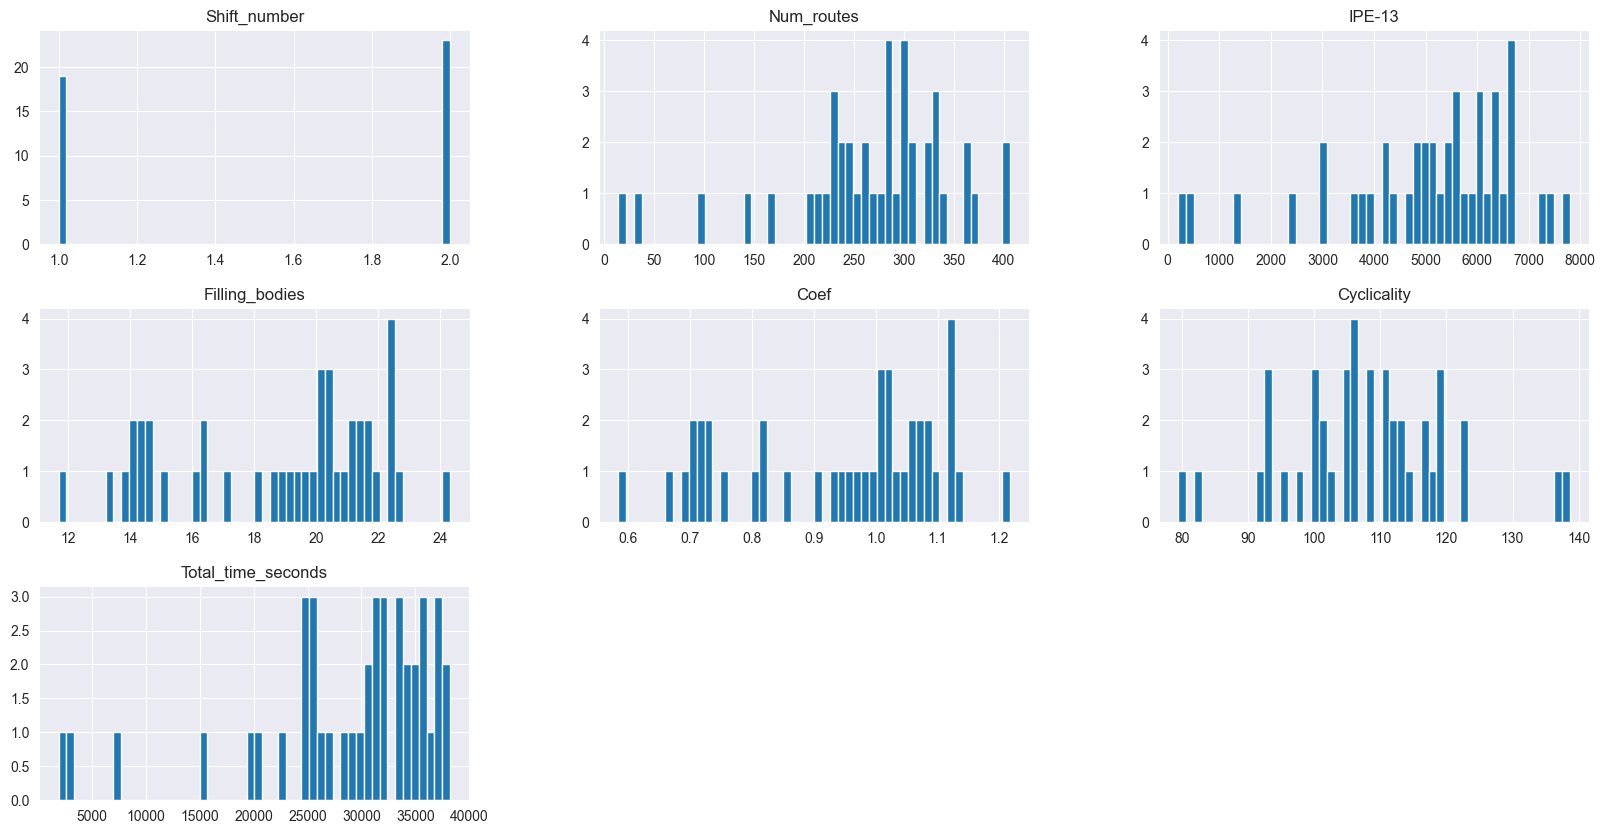

In [177]:
bnd.hist(bins=50, figsize=[20, 10])

В данных мы можем заметить выбросы и неравномерное распределение в признаках, которые влияют на среднее значение. Это обусловлено не стабильностью работы по некоторым показателям, для более детально мы рассмотрим далее, проведя полный анализ и составив матрицы корреляции.



# Смотрим корреляцию признаков

<AxesSubplot:>

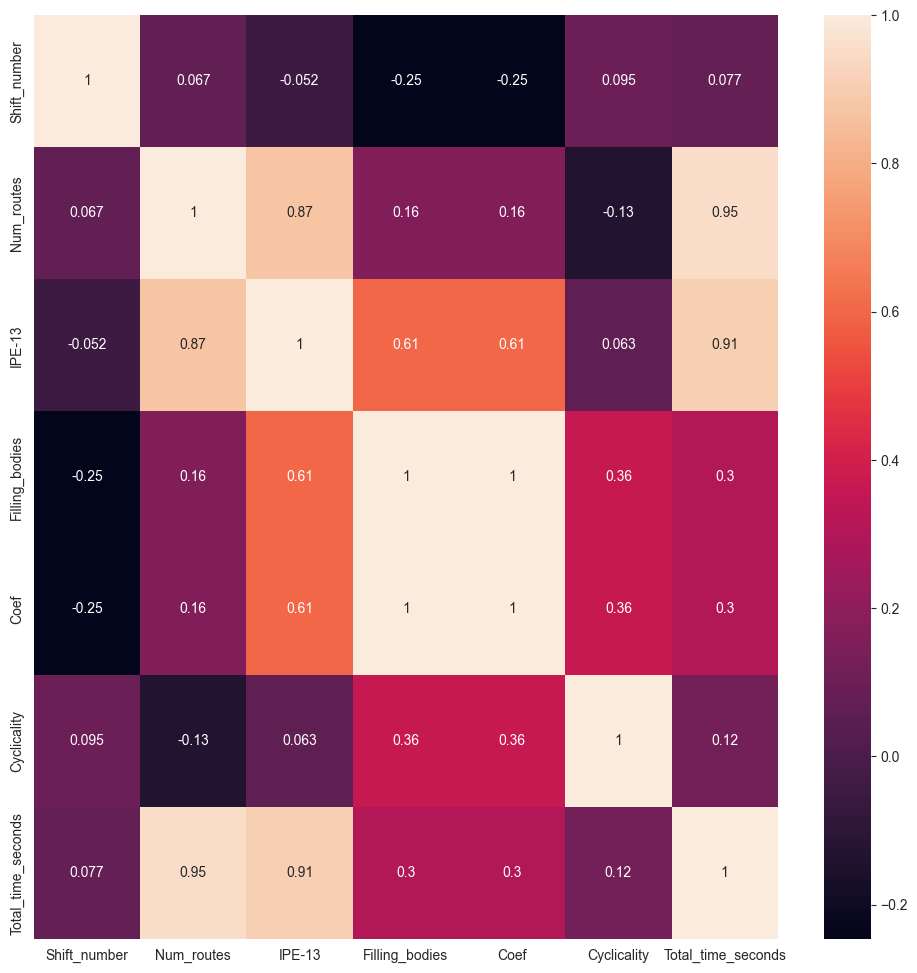

In [178]:
plt.figure(figsize=(12, 12))
sns.heatmap(bnd.corr(), annot=True)

Составив Heatmap корреляции признаков мы можем увидеть довольно сильную корреляции определенных признаков.
Cильную положительную корреляцию следующих признаков:
Coef : Filling_bodies
Total_time_seconds : Num_routes
Total_time_seconds : IPE-13
Num_routes : IPE-13
Среднюю положительную корреляцию следующих признаков:
Coef : IPE-13
Filling_bodies : IPE-13
Слабую отрицательную корреляцию следующих признаков:
Shift_number : Coef
Shift_number : Filling_bodies

Можно сделать выводы:
1. Cильная положительная корреляция между Total_time_seconds и Num_routes, или Total_time_seconds и IPE-13 может означать, что увеличение времени выполнения задачи связано с увеличением количества маршрутов или уровня индекса IPE-13.
2. Средняя положительная корреляция между Coef и IPE-13, или Filling_bodies и IPE-13 может означать, что увеличение коэффициента или наполнения кузова также связано с увеличением уровня индекса IPE-13.
3. Слабая отрицательная корреляция между Shift_number и Coef или Shift_number и Filling_bodies может означать, что увеличение номера смены может быть связано с уменьшением коэффициента или наполнения кузова. Соответственно во 2 смене показатели коэффициента и наполнения кузова меньше чем в первой. Но тут нужны дополнительные исследования для подтверждения статистической значимости, насколько сильна эта зависимость.

Если мы планируем обучать модель на этих данных стоит обработать сильные и средние зависимости, возможно путем снижения размерности данных.

# Проведем дополнительный анализ

### 1. Распределение работы в различные смены и дни недели:

#### •	Сравним работу карьерного самосвала в разные смены, чтобы оценить, какие смены являются наиболее и наименее продуктивными.

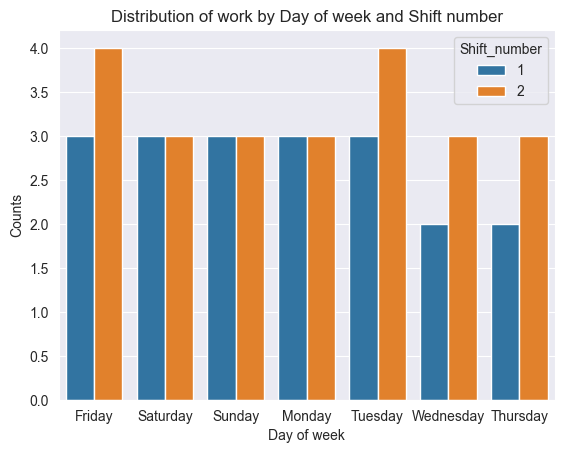

In [179]:
sns.countplot(x='day_of_week', hue='Shift_number', data=bnd)
plt.xlabel('Day of week')
plt.ylabel('Counts')
plt.title('Distribution of work by Day of week and Shift number')
plt.show()

Тут мы видим, что по количеству наш самосвал чаще работает в 2 смену во вторник, среду, четверг и в пятницу.
В среду и вторник работы выполняется меньше, чем в другие дни не зависимо от смены.

### Проанализируем продуктивность смены:

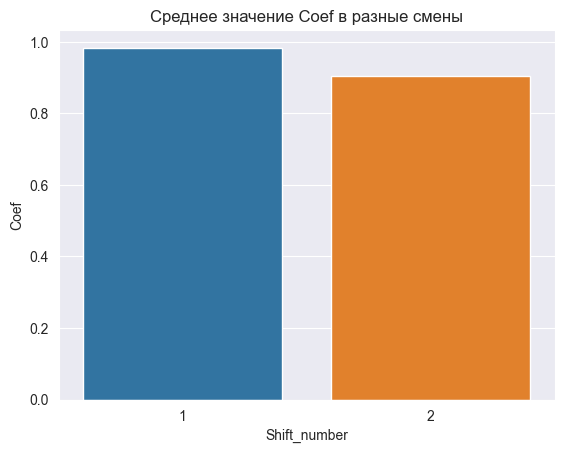

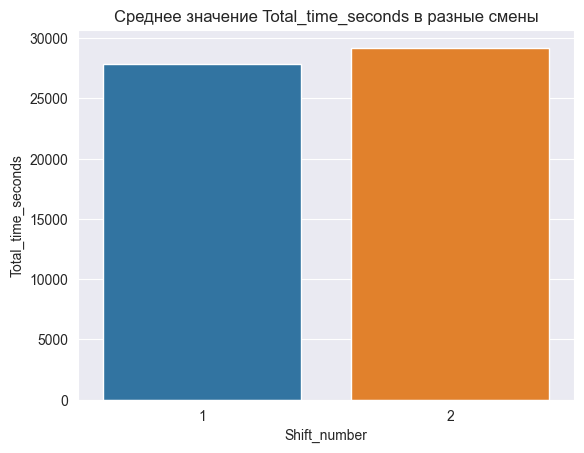

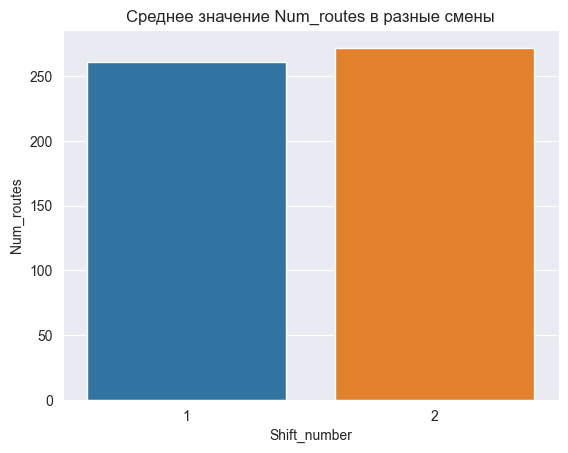

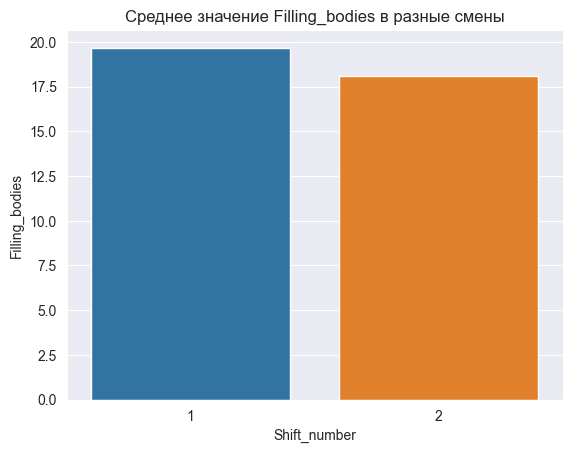

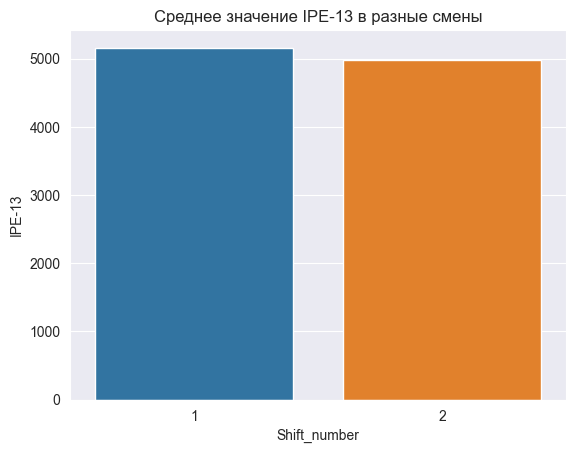

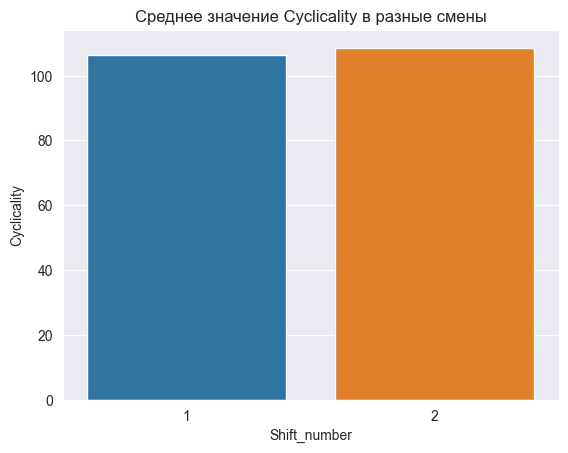

In [186]:
# Группирование данных по сменам
grouped_shift= bnd.groupby('Shift_number').agg(
    {'Coef': 'mean', 'Total_time_seconds': 'mean', 'Num_routes': 'mean', 'Filling_bodies': 'mean', 'IPE-13': 'mean',
     'Сyclicality': 'mean'})

# Список столбцов для визуализации
columns = ['Coef', 'Total_time_seconds', 'Num_routes', 'Filling_bodies', 'IPE-13','Сyclicality']

# Цикл по столбцам
for col in columns:
    plt.figure()
    sns.barplot(x=grouped_shift.index, y=col, data=grouped_shift)
    plt.title(f"Среднее значение {col} в разные смены")
    plt.xlabel("Shift_number")
    plt.ylabel(col)

plt.show()

In [187]:
grouped_shift

,Coef,Total_time_seconds,Num_routes,Filling_bodies,IPE-13,Сyclicality
Shift_number,,,,,,
1,0.983811,27887.368421,260.894737,19.676229,5161.421053,106.417512
2,0.903985,29225.217391,272.130435,18.079702,4984.434783,108.689641


По анализу продуктивности мы видим, что Coef в 1 смене выше чем во 2, время затраченное на работу выше в 2 смене, количество маршрутов выше в 2 смене, наполнение кузова выше в 1 смена о чем свидетельствут показатель IPE-13,а цикличность выше во 2 смене.

Из этой информации мы можем сделать вывод, что обе смены имеют свои слабости и сильные стороны. Например, 1 смена имеет более высокое наполнение кузова, но менее высокий Coef. В то же время 2 смена имеет менее высокое наполнение кузова, но более высокий Coef и большее количество маршрутов. Чтобы сделать конкретные выводы и улучшить производительность, необходимо провести дополнительный анализ и учитывать другие факторы, такие как оборудование, квалификация и опыт работников и т.д.

### •	Сравним работу в разные дни недели, чтобы выявить, в какие дни работа более эффективна, а в какие - менее.

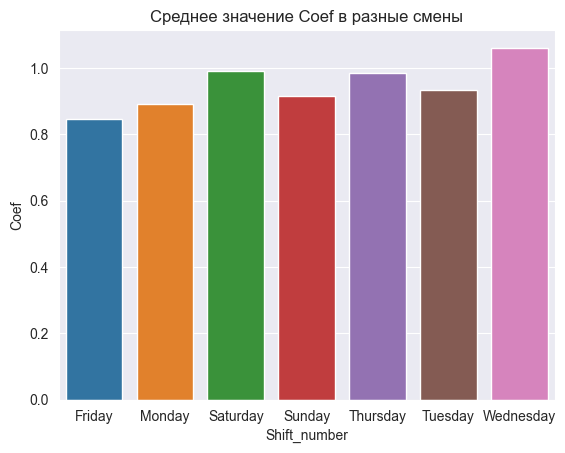

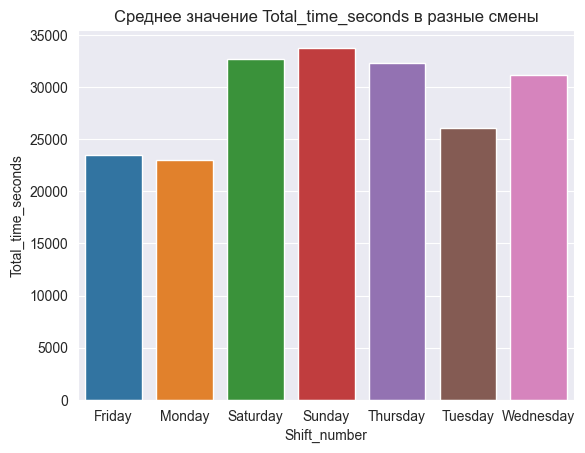

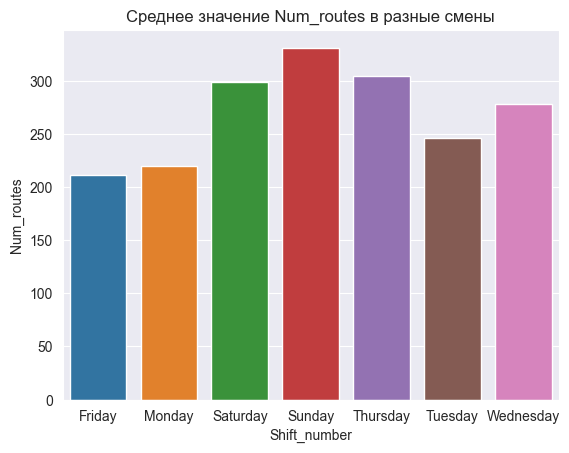

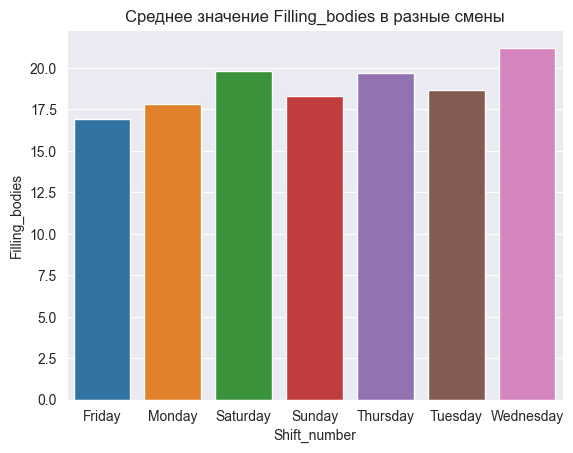

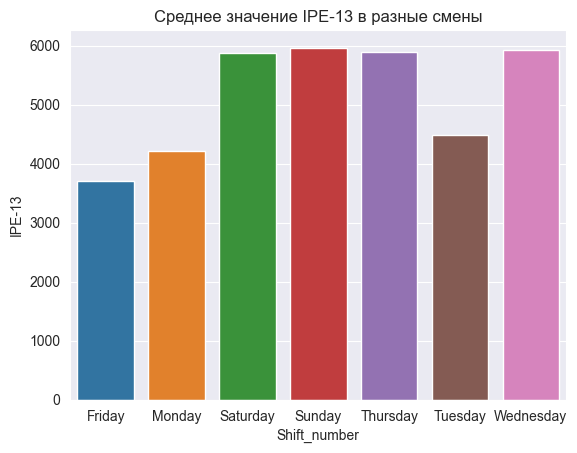

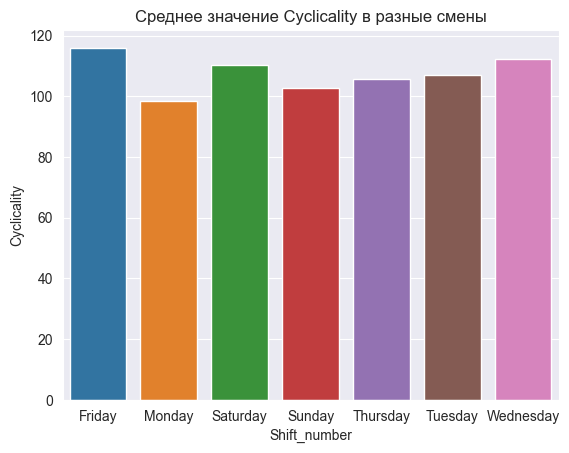

In [196]:
# Группирование данных по дням недели
grouped_day = bnd.groupby('day_of_week').agg( {'Coef': 'mean', 'Total_time_seconds': 'mean', 'Num_routes': 'mean', 'Filling_bodies': 'mean', 'IPE-13': 'mean', 'Сyclicality': 'mean'})

# Список столбцов для визуализации
columns = ['Coef', 'Total_time_seconds', 'Num_routes', 'Filling_bodies', 'IPE-13','Сyclicality']

# Цикл по столбцам
for col in columns:
    plt.figure()
    sns.barplot(x=grouped_day.index, y=col, data=grouped_day)
    plt.title(f"Среднее значение {col} в разные смены")
    plt.xlabel("Shift_number")
    plt.ylabel(col)

plt.show()

In [192]:
grouped_day

,Coef,Total_time_seconds,Num_routes,Filling_bodies,IPE-13,Сyclicality
day_of_week,,,,,,
Friday,0.846406,23511.428571,211.714286,16.928110,3698.142857,116.027617
Monday,0.890219,23040.000000,219.333333,17.804379,4212.333333,98.498296
Saturday,0.992324,32690.000000,299.166667,19.846471,5875.333333,110.360675
Sunday,0.916679,33820.000000,331.166667,18.333578,5967.166667,102.784833
Thursday,0.984901,32304.000000,304.400000,19.698014,5892.600000,105.806060
Tuesday,0.933084,26100.000000,246.142857,18.661686,4488.285714,106.963212
Wednesday,1.061563,31188.000000,278.200000,21.231257,5922.400000,112.393107


На основе предоставленных данных можно сделать следующий аналитический вывод:

  Индекс IPE-13: наивысший IPE-13 значение выявлено в воскресенье, четверг и среду. Это может указывать на более высокую эффективность работы в эти дни.

  Коэф. наполнения кузова: Самые стабильные значения мы видим в субботу и четверг. В остальные дни есть отклонения от единицы, соответственно есть проблемы с индикаторами которые отвечают за нагруженность самосвала при его загрузке. В следствии мы теряем в количестве перевезенной пароды в случае когда ниже 1 и теряем в ресурсе самосвала в случае если больше 1.

   Общее время работы: Наиболее длительное время затрачено в субботу, воскресенье и четверг. Это может указывать на более сложные или длительные маршруты в эти дни.

   Количество маршрутов: Наибольшее количество маршрутов выявлено в субботу и четверг. Это может указывать на более высокую нагрузку в эти дни.

   Объем наполнения кузова: На основе данных можно сделать вывод, что наибольшее значение показателя Filling_bodies выявлено в среду. Это может указывать на более высокую загрузку в этот день или неэффективные методы загрузки.

   Цикличность: На основе данных можно сделать вывод, что значения показателя Cyclicality в течение всех дней недели в пределах нормы. Это может указывать на хорошую стабильность работы самосвала и отсутствие проблем с цикличностью загрузки.


## Так как в задании отсутствует Target, на который можно интерпретировать результат, дальнейший анализ не целесообразен.
# Спасибо !